In [1]:
# import libraries for Visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_pickle(r"C:\Users\user\OneDrive\Desktop\python\US_Accidents_Cleaned.pkl")

In [3]:
# create new features for timeseries analysis.
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day
df['Day_Name'] = df['Start_Time'].dt.day_name()
df['Week'] = df['Start_Time'].dt.week
df['Month'] = df['Start_Time'].dt.month
df['Count'] = 1

<ipython-input-3-ac6b3df4125e>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Start_Time'].dt.week


In [4]:
df.groupby('Month')['Count'].value_counts()

Month  Count
1      1        301931
2      1        284394
3      1        293386
4      1        299487
5      1        296605
6      1        310361
7      1        258191
8      1        326230
9      1        380891
10     1        464274
11     1        492877
12     1        520767
Name: Count, dtype: int64

Text(0.5, 1.0, 'Monthly Accident Count')

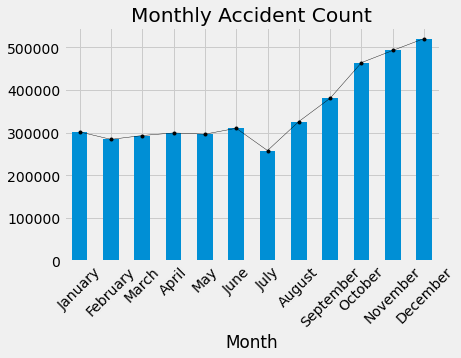

In [5]:
import calendar
df.groupby('Month')['Count'].value_counts().plot(kind='bar')
df.groupby('Month')['Count'].value_counts().plot(color='k',linestyle='-',marker='.',linewidth=0.4)
plt.xticks(np.arange(12),calendar.month_name[1:13],rotation=45)
plt.xlabel('Month')
plt.title('Monthly Accident Count')

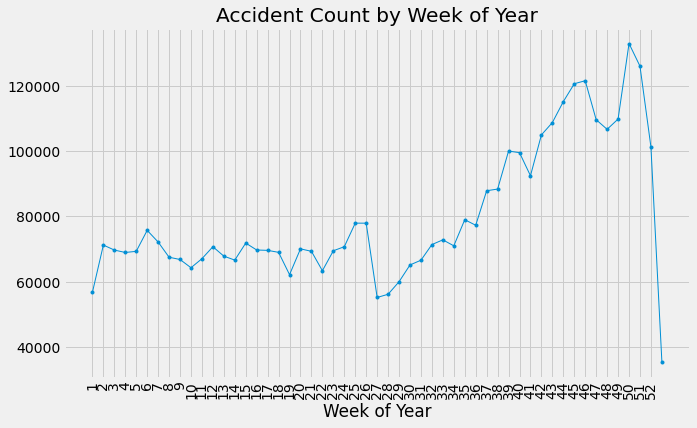

In [6]:
plt.figure(figsize=(10,6))
df.groupby('Week')['Count'].value_counts().plot(linewidth=1,marker='.')
plt.xticks(np.arange(52),np.arange(1,53),rotation = 90)
plt.xlabel('Week of Year')
plt.title('Accident Count by Week of Year')
plt.show()

ValueError: The number of FixedLocator locations (50), usually from a call to set_ticks, does not match the number of ticklabels (49).

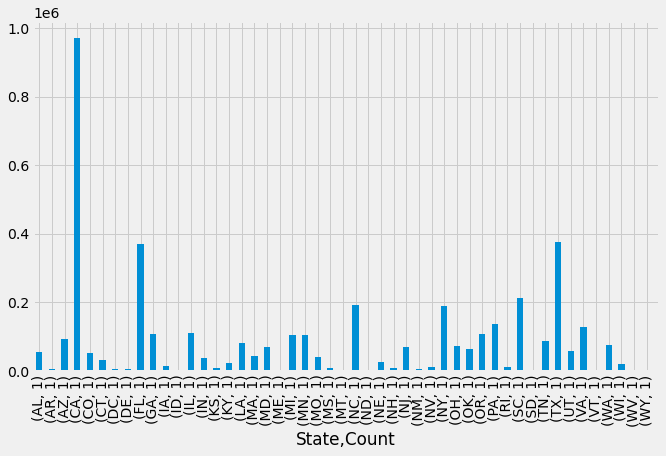

In [7]:
plt.figure(figsize=(10,6))
df.groupby('State')['Count'].value_counts().plot(kind='bar')
plt.xticks(np.arange(50),sorted(df['State'].unique()),rotation = 90)
plt.xlabel('State')
plt.title('Accident Count by State')
plt.show()

In [8]:
by_severity = df.groupby('Severity')['Count'].sum()

<AxesSubplot:xlabel='Severity', ylabel='count'>

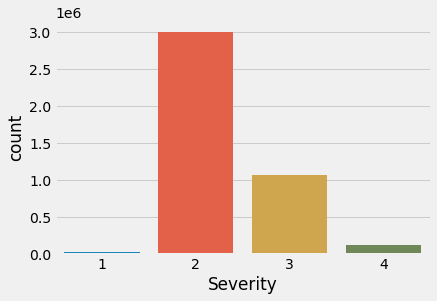

In [9]:
sns.countplot(x='Severity',data=df)

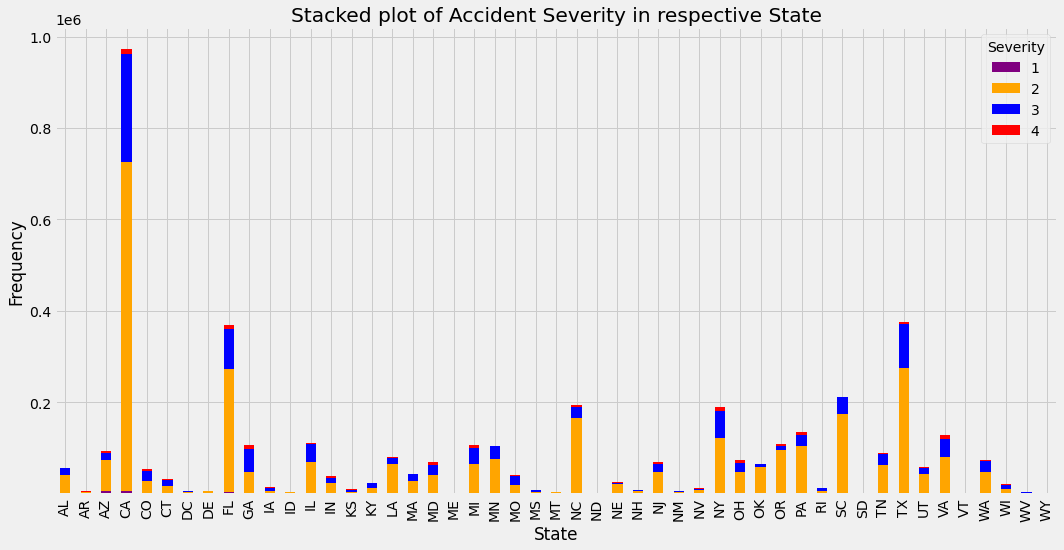

In [10]:
# Bivariate visualization of categorical variables

#create a frequency table of state against severity
cat_var = pd.crosstab(columns=df['Severity'],
    index=df['State'])

#plot a stacked plot
cat_var.plot(kind='bar',stacked=True,figsize=(16,8),color=['purple','orange','blue','red','green'])
plt.title('Stacked plot of Accident Severity in respective State')
plt.ylabel('Frequency')
plt.show()

(0.0, 100.0)

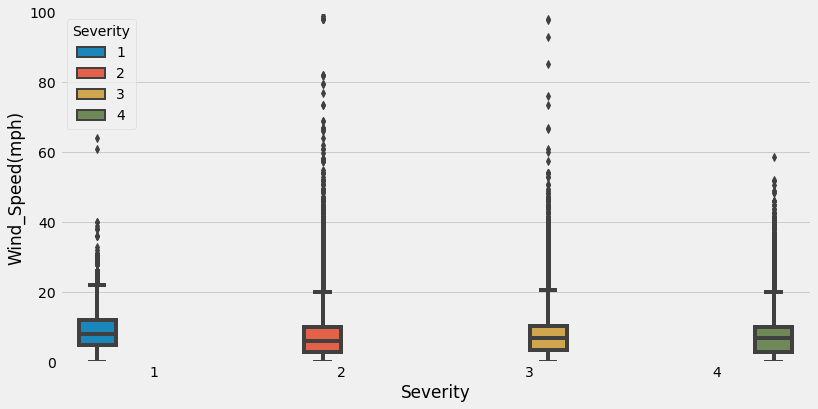

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Severity',y='Wind_Speed(mph)',data=df,hue='Severity')
plt.ylim(0,100)

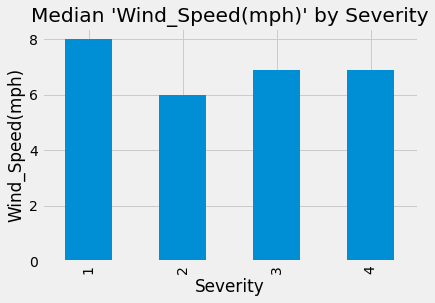

In [12]:
# I used median here because there are so many outliers in the boxplot that i felt using mean would skew the data

df.groupby('Severity')['Wind_Speed(mph)'].median().plot(kind='bar')
plt.ylabel('Wind_Speed(mph)')
plt.title("Median 'Wind_Speed(mph)' by Severity")
plt.show()

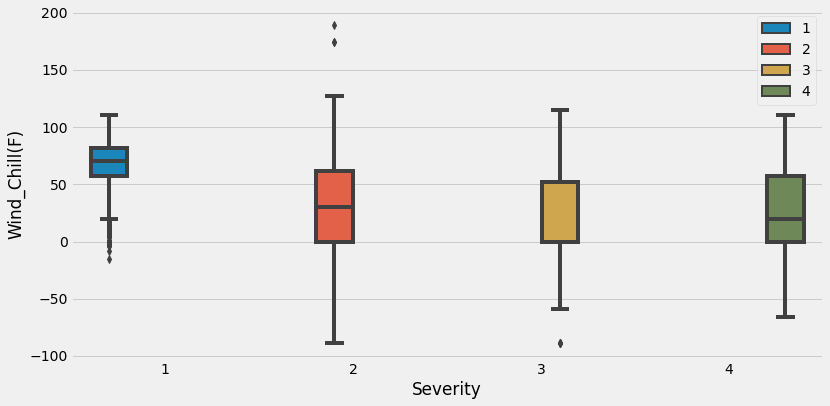

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Severity',y='Wind_Chill(F)',data=df,hue='Severity')
plt.legend(loc='best')
plt.show()

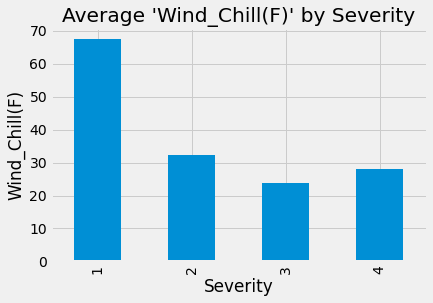

In [14]:
df.groupby('Severity')['Wind_Chill(F)'].mean().plot(kind='bar')
plt.ylabel('Wind_Chill(F)')
plt.title("Average 'Wind_Chill(F)' by Severity")
plt.show()

In [15]:
def catplotter(col):
    x = df.groupby([col, 'Severity'])['Count'].sum().reset_index()
    sns.catplot("Severity", "Count", col=col, data=x, kind="bar")
    plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


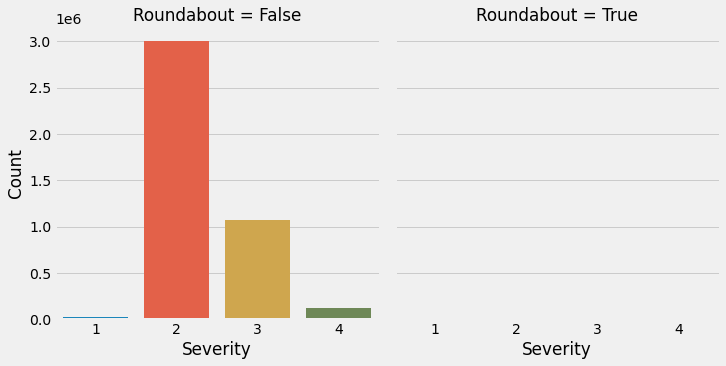

In [16]:
catplotter('Roundabout')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


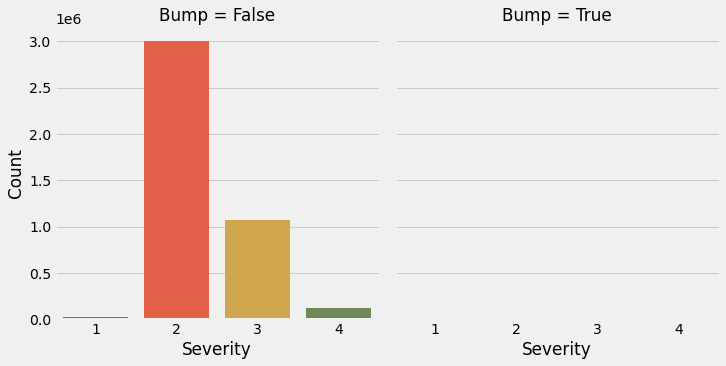

In [17]:
catplotter('Bump')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


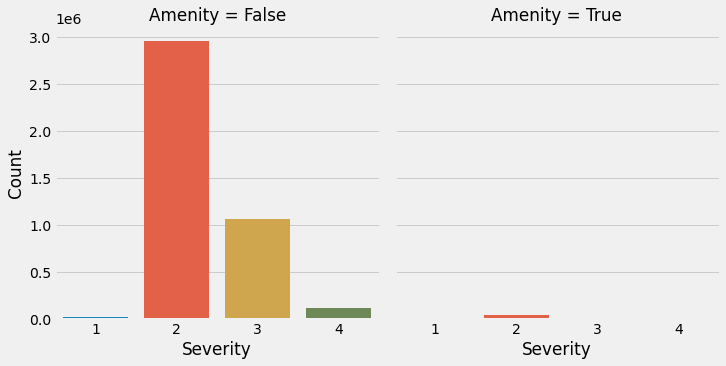

In [18]:
catplotter('Amenity')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


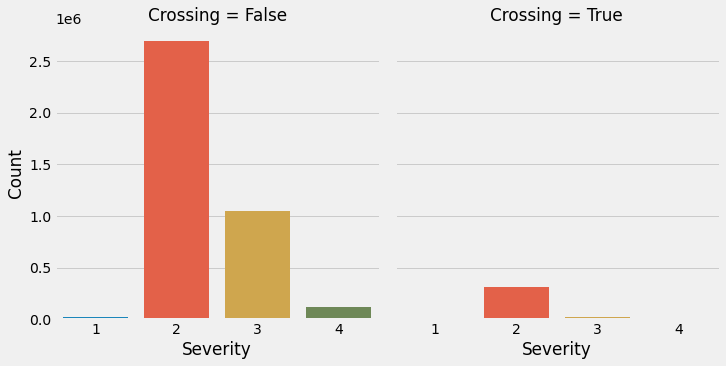

In [19]:
catplotter('Crossing')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


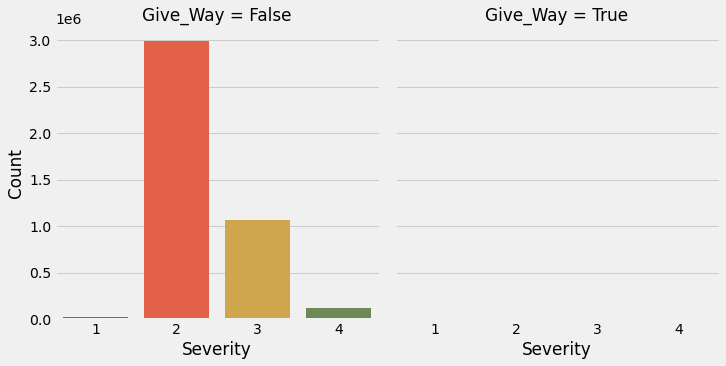

In [20]:
catplotter('Give_Way')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


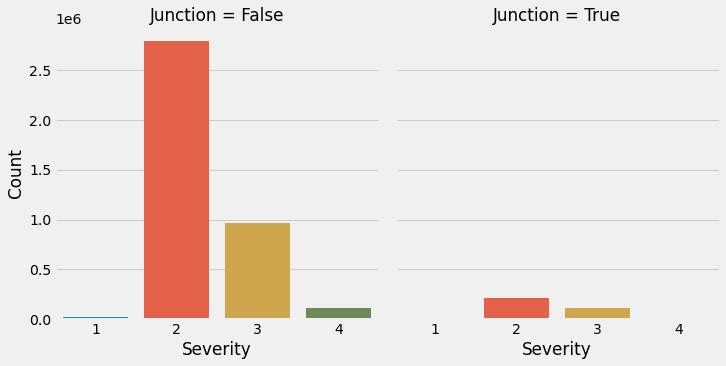

In [21]:
catplotter('Junction')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


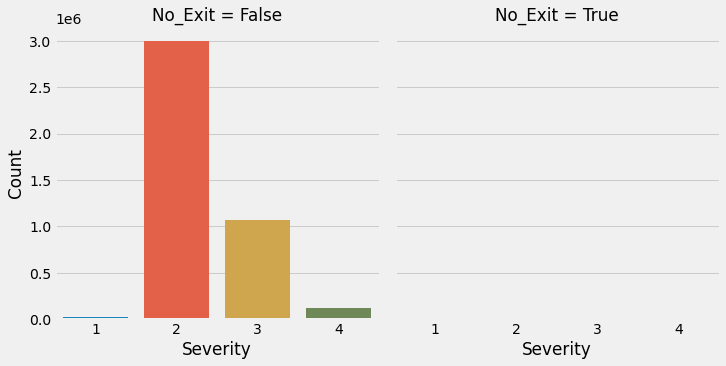

In [22]:
catplotter('No_Exit')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


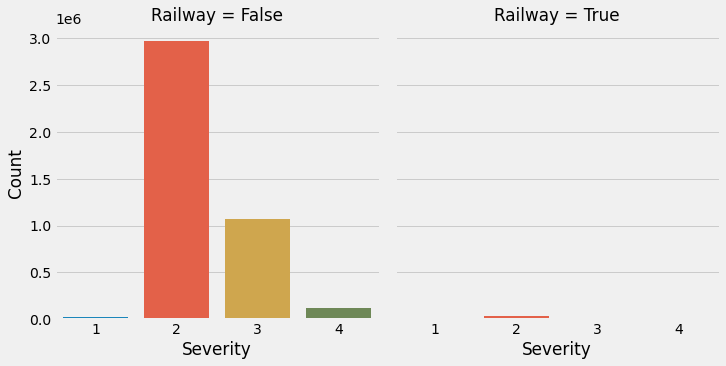

In [23]:
catplotter('Railway')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


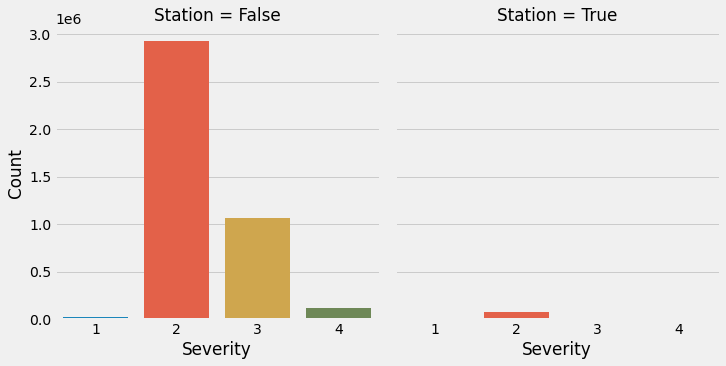

In [24]:
catplotter('Station')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


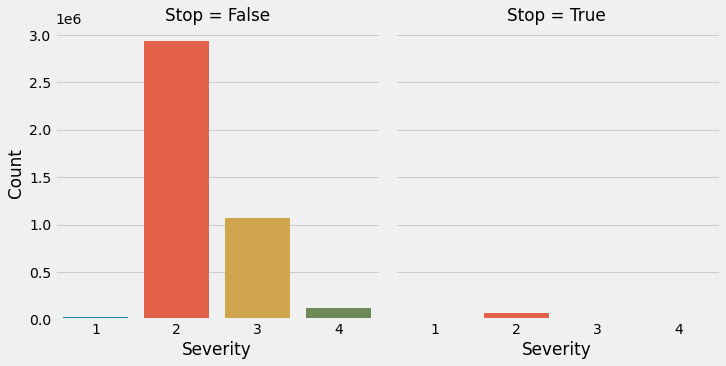

In [25]:
catplotter('Stop')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


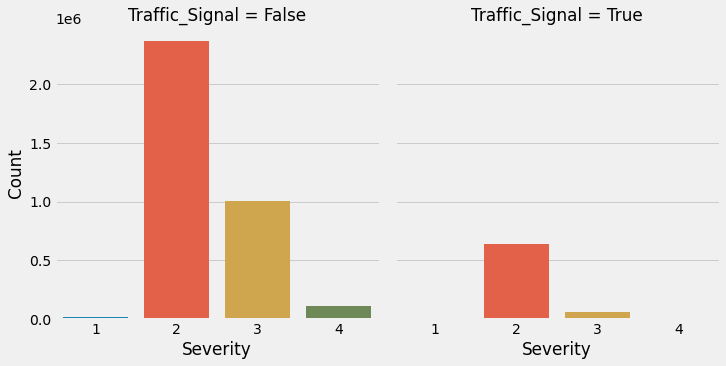

In [26]:
catplotter('Traffic_Signal')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


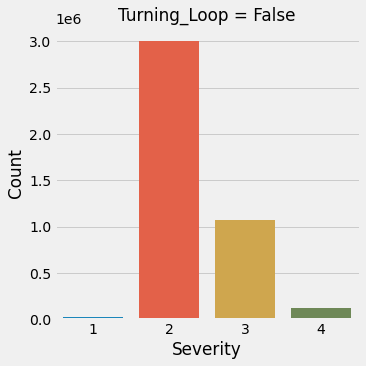

In [27]:
catplotter('Turning_Loop')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


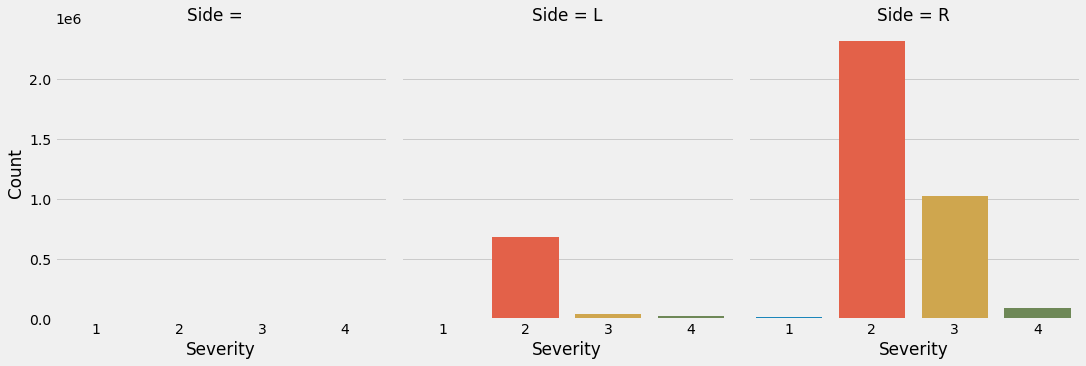

In [28]:
catplotter('Side')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


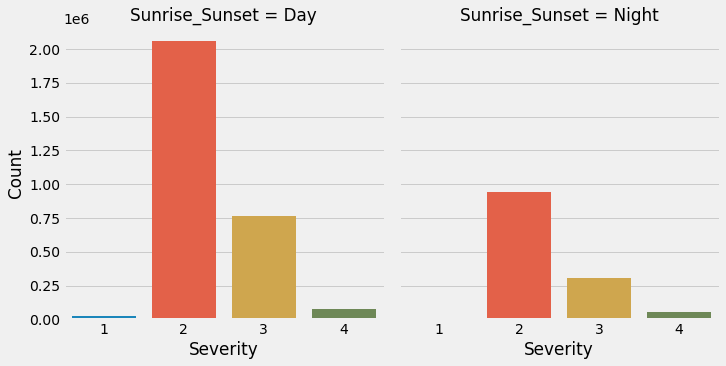

In [29]:
catplotter('Sunrise_Sunset')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


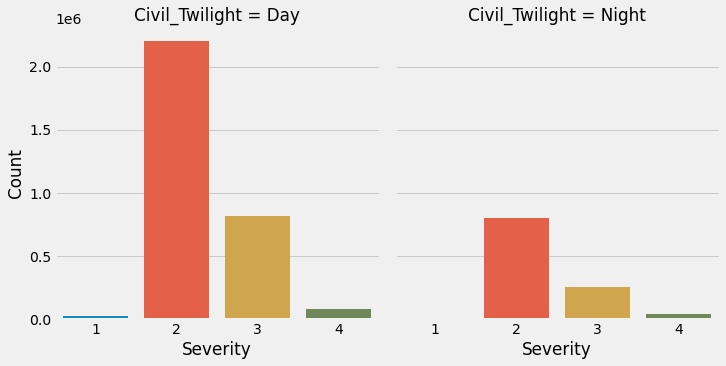

In [30]:
catplotter('Civil_Twilight')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


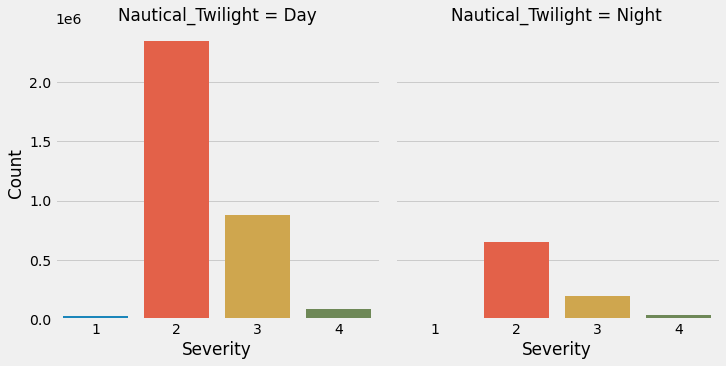

In [31]:
catplotter('Nautical_Twilight')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


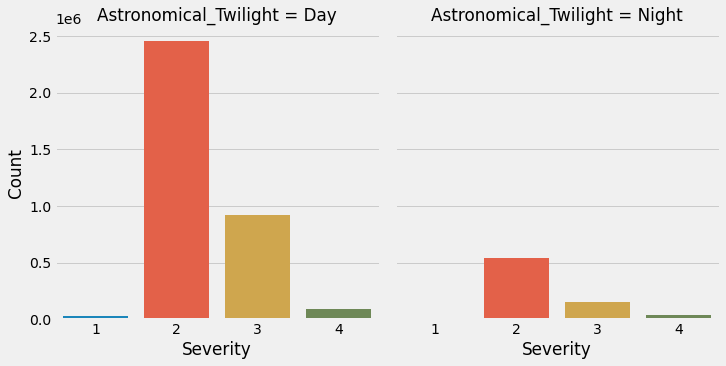

In [32]:
catplotter('Astronomical_Twilight')

In [33]:
df.sample(10)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day,Day_Name,Week,Month,Count
1808949,A-1809061,MapQuest,201.0,2,2018-10-08 17:08:34,2018-10-08 17:38:02,45.108810,-93.391464,0.000,Accident on US-169 Northbound at County Hwy-81.,...,Day,Day,Day,Day,17,8,Monday,41,10,1
3554855,A-3564806,Bing,201.0,2,2020-06-19 17:19:00,2020-06-19 18:13:44,37.710881,-121.719082,0.000,At Greenville Rd - Accident.,...,Day,Day,Day,Day,17,19,Friday,25,6,1
2265664,A-2265783,MapQuest,201.0,3,2018-03-22 09:59:09,2018-03-22 10:28:32,38.275505,-85.810318,2.020,Right hand shoulder blocked due to accident on...,...,Day,Day,Day,Day,9,22,Thursday,12,3,1
2264898,A-2265017,MapQuest,201.0,3,2018-03-21 05:37:22,2018-03-21 06:22:05,33.774258,-118.071495,0.000,Accident on I-405 Southbound near Exit 22 Gate...,...,Night,Night,Night,Day,5,21,Wednesday,12,3,1
796195,A-796274,MapQuest,201.0,3,2020-06-28 16:28:20,2020-06-28 17:30:56,30.286135,-82.020119,0.000,Right lane blocked due to accident on I-10 Eas...,...,Day,Day,Day,Day,16,28,Sunday,26,6,1
2797115,A-2797238,Bing,201.0,2,2016-08-26 09:29:38,2016-08-26 15:29:38,36.110900,-86.744470,0.000,At Logan St - Accident.,...,Day,Day,Day,Day,9,26,Friday,34,8,1
3067110,A-3068894,Bing,201.0,2,2020-09-27 07:17:00,2020-09-27 20:51:17,34.137821,-117.331102,0.165,Incident on ADAMS ST near HOUSE 1931 Drive wit...,...,Day,Day,Day,Day,7,27,Sunday,39,9,1
2544690,A-2544812,MapQuest,201.0,3,2017-10-12 07:04:47,2017-10-12 07:34:22,38.190861,-85.729935,0.000,Accident on I-65 Southbound at Exits 131-A 131...,...,Night,Night,Day,Day,7,12,Thursday,41,10,1
4101622,A-4111635,Bing,201.0,2,2017-12-18 07:30:37,2017-12-18 13:30:37,33.247206,-87.574383,0.320,At 46th St - Accident. Right lane blocked.,...,Day,Day,Day,Day,7,18,Monday,51,12,1
3597117,A-3607087,Bing,201.0,4,2020-03-29 19:44:11,2020-03-29 20:29:11,41.414900,-73.272350,0.968,Closed between Fairfield/New Haven County Line...,...,Night,Night,Day,Day,19,29,Sunday,13,3,1


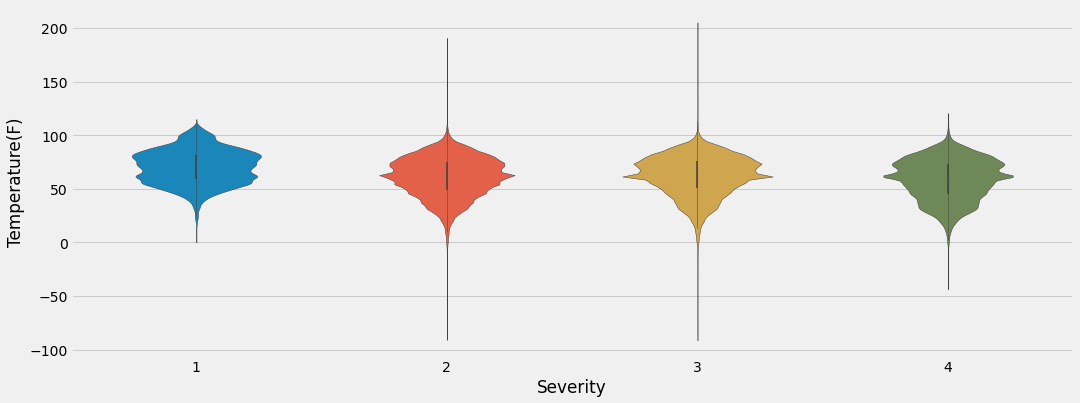

In [34]:
# Severity Impact by Temperature
plt.figure(figsize = (16, 6))
sns.violinplot(y="Temperature(F)", x="Severity", data=df,width=0.6,linewidth=0.5)
plt.show()

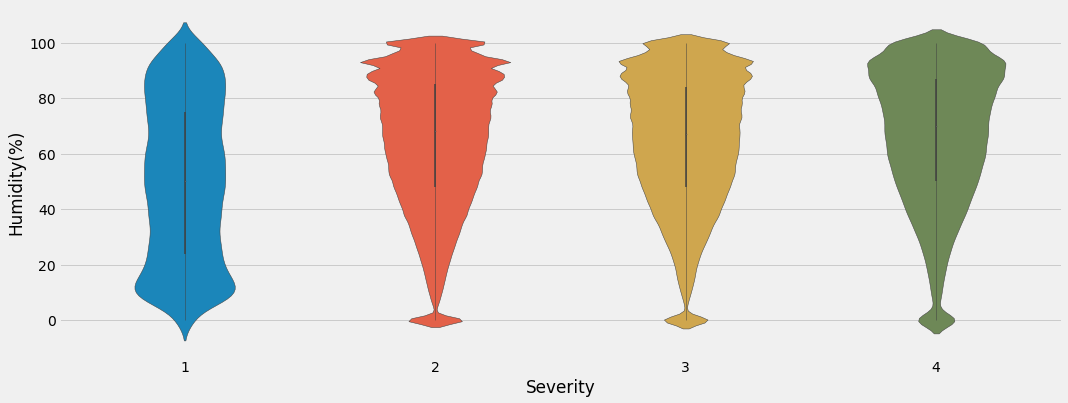

In [35]:
# Severity Impact by Humidity 
plt.figure(figsize = (16, 6))
sns.violinplot(y="Humidity(%)", x="Severity", data=df,width=0.6,linewidth=0.5)
plt.show()

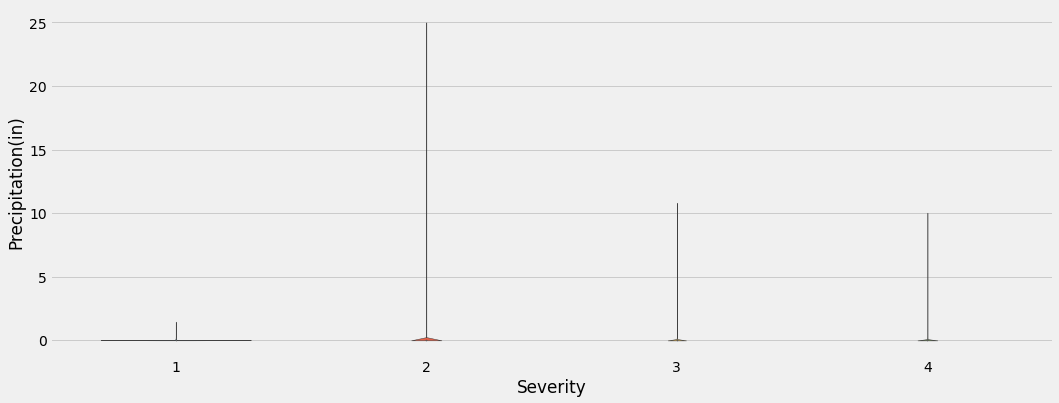

In [36]:
# Severity Impact by Precipitation(in) 
plt.figure(figsize = (16, 6))
sns.violinplot(y='Precipitation(in)', x="Severity", data=df,width=0.6,linewidth=0.5)
plt.show()

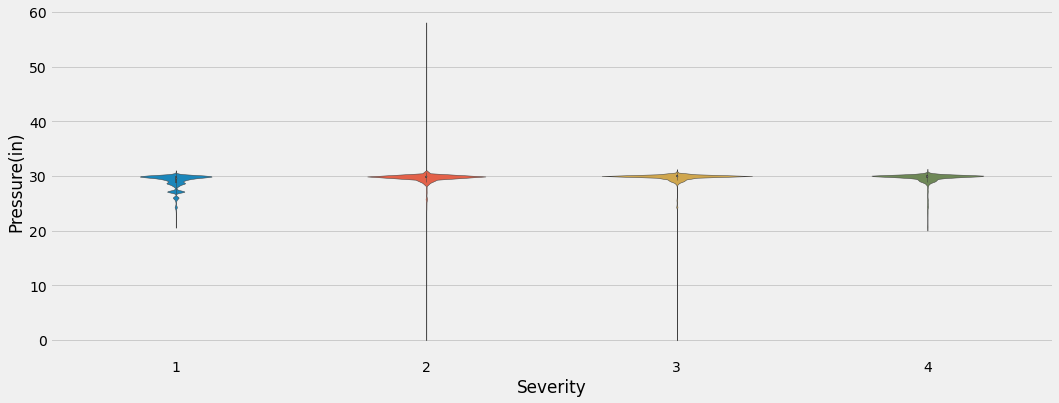

In [37]:
# Severity Impact by Pressure(in)
plt.figure(figsize = (16, 6))
sns.violinplot(y='Pressure(in)', x="Severity", data=df,width=0.6,linewidth=0.5)
plt.show()

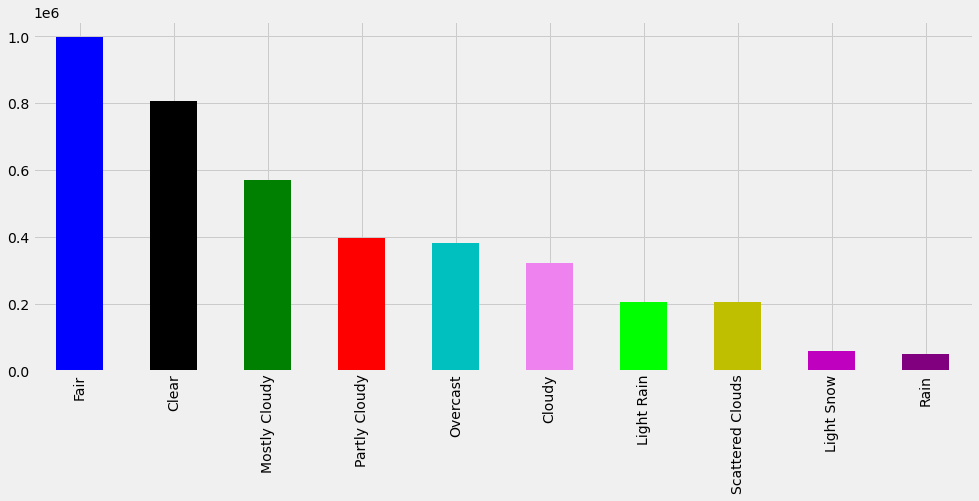

In [38]:
# Top 10 weather condition
plt.figure(figsize = (15, 6))
df[df['Weather_Condition'] != 0]['Weather_Condition'].value_counts().iloc[:10].plot(
    kind='bar',color=['b','k','g','r','c','violet','lime','y','m','purple'])
plt.show()

[]

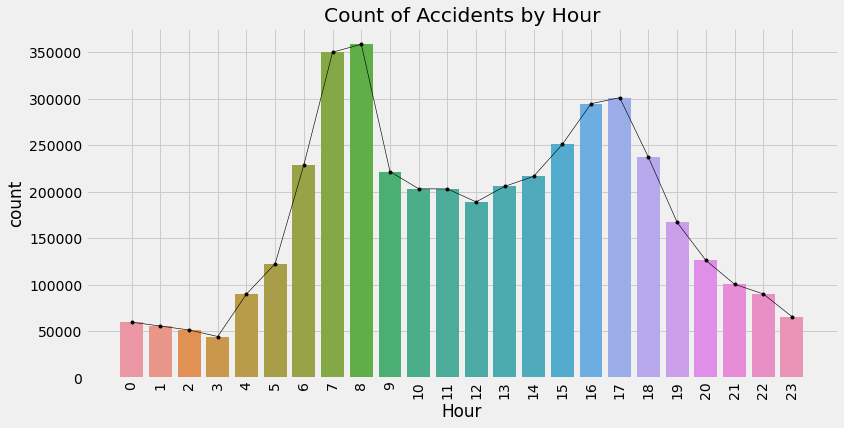

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour',data=df)
df.groupby('Hour')['Count'].value_counts().plot(color='k',linestyle='-',marker='.',linewidth=0.6)
plt.title('Count of Accidents by Hour')
plt.xticks(np.arange(0,24),np.arange(0,24),rotation=90)
plt.xlabel('Hour')
plt.plot()

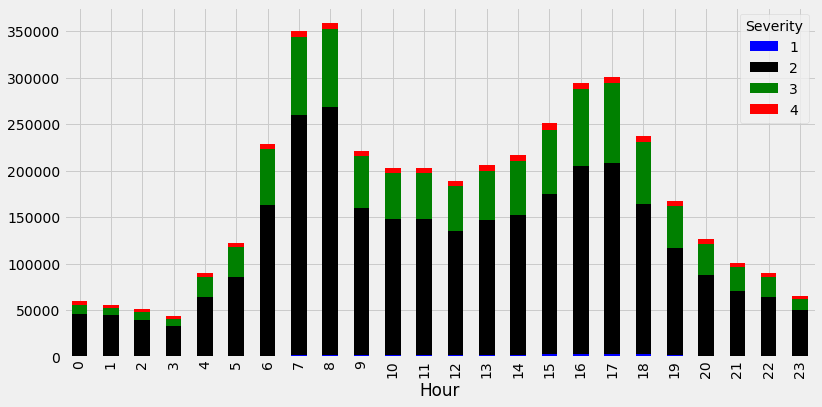

In [40]:
x = pd.crosstab(index=df['Hour'],columns=df['Severity'])
x.plot(kind='bar',stacked=True, color=['b','k','g','r','c'],figsize=(12,6))
plt.show()

In [42]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [43]:
severity_2 = df[df['Severity']==2]['Description']
severity_3 = df[df['Severity']==3]['Description']
severity_4 = df[df['Severity']==4]['Description']


In [44]:
desc_2 = severity_2.str.split("(").str[0].value_counts().keys()
wc_desc_2 = WordCloud(scale=5,max_words=100,colormap="rainbow",background_color="white").generate(" ".join(desc_2))

desc_3 = severity_3.str.split("!").str[0].value_counts().keys()
wc_desc_3 = WordCloud(scale=5,max_words=100,colormap="rainbow",background_color="white").generate(" ".join(desc_3))

desc_4 = severity_4.str.split("!").str[0].value_counts().keys()
wc_desc_4 = WordCloud(scale=5,max_words=100,colormap="rainbow",background_color="white").generate(" ".join(desc_4))

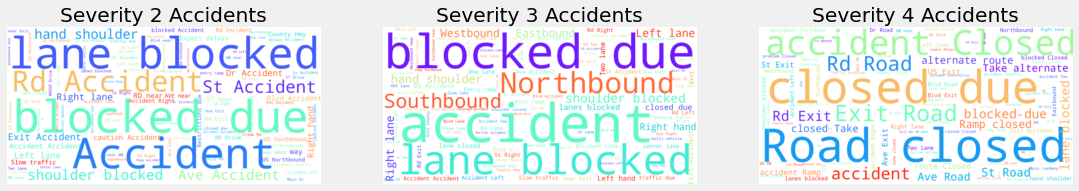

In [45]:
fig, axs = plt.subplots(1,3,sharey=True,figsize=(17,14))

axs[0].imshow(wc_desc_2,interpolation="bilinear")
axs[1].imshow(wc_desc_3,interpolation="bilinear")
axs[2].imshow(wc_desc_4,interpolation="bilinear")

axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")

axs[0].set_title('Severity 2 Accidents')
axs[1].set_title('Severity 3 Accidents')
axs[2].set_title('Severity 4 Accidents')

plt.show()

In [46]:
import folium

In [47]:
df.sample(3)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day,Day_Name,Week,Month,Count
3122360,A-3128077,Bing,201.0,2,2020-10-13 21:02:00,2020-10-14 02:32:19,38.948787,-121.157939,0.148,Incident on MOUNT VERNON RD near HOUSE 7730 Dr...,...,Night,Night,Night,Night,21,13,Tuesday,42,10,1
3323428,A-3331998,Bing,201.0,2,2020-12-26 02:12:01,2020-12-26 03:57:01,42.245768,-122.773772,2.895,Incident on I-5 NB near MP 24 Drive with caution.,...,Night,Night,Night,Night,2,26,Saturday,52,12,1
3782531,A-3792539,Bing,201.0,2,2019-10-05 08:15:33,2019-10-05 12:15:33,45.954340,-123.926380,0.081,At US-26/Sunset Hwy - Accident.,...,Day,Day,Day,Day,8,5,Saturday,40,10,1
